This Notebook is supposed to act as a step-by-step explanation of the
[Enf analysis script](https://github.com/Wuelle/enf_analysis) i made. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)

The [data](https://data.nationalgrideso.com/system/system-frequency-data?from=0#resources) has a resolution of one sample per second. So there is no need to calculate anything more precise than that since we would just be overfitting the data anyway.

In [25]:
from scipy.io import wavfile
samplerate, data = wavfile.read("data/input.wav")
data = data[:, 0] # convert to mono
print(samplerate, data.shape)

48000 (21003843,)


A samplerate of 48000 means that to get one Fourier transform per second, we need to offset our sliding window by 48000 samples each time. Since we expect a frequency of around 50 Hertz, a window size of 10 seconds, amounting to ~500 cycles should be more than sufficient.

In [19]:
window_length = 10 # length of the window in seconds
window_size = samplerate * window_length # number of samples per window
n_windows = len(data) // window_size # total number of windows
fft_size = 1000
result = np.zeros(n_windows, fft_size)

Just slicing the wave file to the size of a window is insufficient, since it artificially creates edges at the start and end of the window. To avoid this, we multiply the window by a half cosine function to ensure a smooth transition. (This is also called a [Hanning Window](https://numpy.org/doc/stable/reference/generated/numpy.hanning.html))

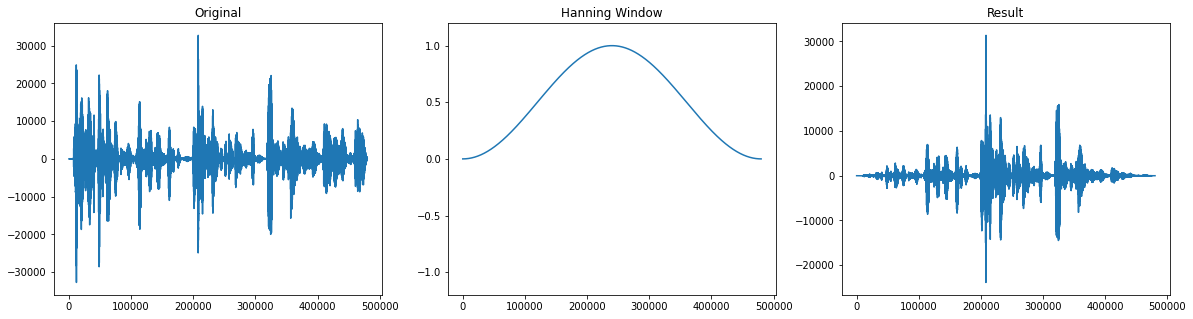

In [54]:
window = data[0:window_size]
scale = np.hanning(window_size)

# Original data, unscaled
plt.subplot(1, 3, 1)  # row 1, column 1, count 1
plt.title("Original")
plt.plot(window)

# Scale factor
plt.subplot(1, 3, 2)  # row 1, column 2, count 2
plt.title("Hanning Window")
plt.ylim(-1.2, 1.2)
plt.plot(scale)

# Scaled data
plt.subplot(1, 3, 3)  # row 1, column 3, count 3
plt.title("Result")
plt.plot(window * scale)

plt.show()

We also need to pad our data to twice its original size. The reason for this will become apparent later on.

In [60]:
window_padded = np.concatenate((window, np.zeros(window_size)))

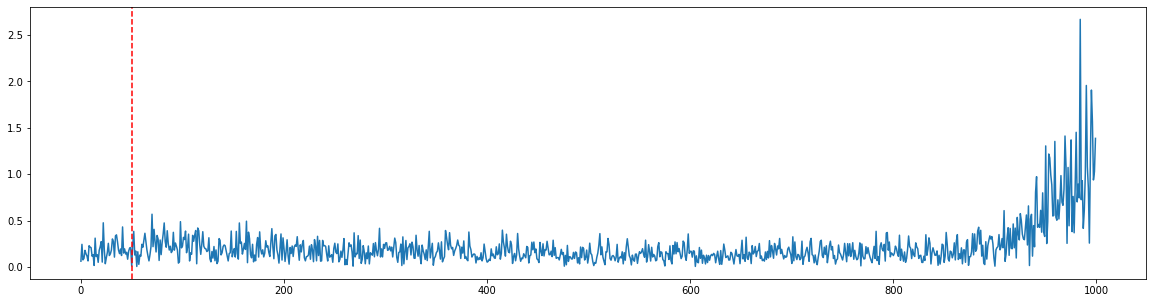

In [70]:
fourier = np.abs(fft(window))[:1000] / window_size
plt.plot(fourier)
plt.axvline(x=50, color='red', linestyle='--')
plt.show()